## Import libraries 

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
data_path = ('CVD_dataset.csv')

In [3]:
data = pd.read_csv(data_path)
data.head()

,General_Health,Exercise,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,Heart_Disease
0,Poor,No,No,No,No,No,Yes,Female,70-74,150,32.66,14.54,Yes,0,30,16,No
1,Very Good,No,No,No,No,Yes,No,Female,70-74,165,77.11,28.29,No,0,30,0,Yes
2,Very Good,Yes,No,No,No,Yes,No,Female,60-64,163,88.45,33.47,No,4,12,3,No
3,Poor,Yes,No,No,No,Yes,No,Male,75-79,180,93.44,28.73,No,0,30,30,Yes
4,Good,No,No,No,No,No,No,Male,80+,191,88.45,24.37,Yes,0,8,4,No


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 17 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Exercise                      308854 non-null  object 
 2   Skin_Cancer                   308854 non-null  object 
 3   Other_Cancer                  308854 non-null  object 
 4   Depression                    308854 non-null  object 
 5   Diabetes                      308854 non-null  object 
 6   Arthritis                     308854 non-null  object 
 7   Sex                           308854 non-null  object 
 8   Age_Category                  308854 non-null  object 
 9   Height_(cm)                   308854 non-null  int64  
 10  Weight_(kg)                   308854 non-null  float64
 11  BMI                           308854 non-null  float64
 12  Smoking_History               308854 non-nul

In [5]:
data.isnull().sum() # finding is there any null data

General_Health                  0
Exercise                        0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
Heart_Disease                   0
dtype: int64

In [6]:
data.nunique() # differnet value in a column

General_Health                     5
Exercise                           2
Skin_Cancer                        2
Other_Cancer                       2
Depression                         2
Diabetes                           4
Arthritis                          2
Sex                                2
Age_Category                      13
Height_(cm)                       99
Weight_(kg)                      525
BMI                             3654
Smoking_History                    2
Alcohol_Consumption               31
Fruit_Consumption                 77
Green_Vegetables_Consumption      75
Heart_Disease                      2
dtype: int64

In [7]:
data.duplicated().sum() # finding is there any duplicate data

784

In [8]:
data_without_duplicates = data.drop_duplicates(keep='first') # delete duplicate values and keep the first one
data_without_duplicates.info() # new data info after merging duplicate data

<class 'pandas.core.frame.DataFrame'>
Index: 308070 entries, 0 to 308853
Data columns (total 17 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308070 non-null  object 
 1   Exercise                      308070 non-null  object 
 2   Skin_Cancer                   308070 non-null  object 
 3   Other_Cancer                  308070 non-null  object 
 4   Depression                    308070 non-null  object 
 5   Diabetes                      308070 non-null  object 
 6   Arthritis                     308070 non-null  object 
 7   Sex                           308070 non-null  object 
 8   Age_Category                  308070 non-null  object 
 9   Height_(cm)                   308070 non-null  int64  
 10  Weight_(kg)                   308070 non-null  float64
 11  BMI                           308070 non-null  float64
 12  Smoking_History               308070 non-null  ob

## Encoding using LabelEncoder

In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [10]:
# Label Encoding (where data are non neumerical and more than binary statement)

# categorical_columns = ['General_Health', 'Smoking_History', 'Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'Sex', 'Age_Category', 'Diabetes', 'Exercise', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Arthritis', 'Heart_Disease']
for col in data_without_duplicates.columns:
    data_without_duplicates[col] = encoder.fit_transform(data_without_duplicates[col])

# col = data_without_duplicates.columns
# # solved this problem: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
# def encode_column(data_without_duplicates, col, encoder):
#   data_without_duplicates.loc[:, col] = encoder.fit_transform(data_without_duplicates[col])

data_without_duplicates

C:\Users\saons\AppData\Local\Temp\ipykernel_7784\721179929.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_without_duplicates[col] = encoder.fit_transform(data_without_duplicates[col])
C:\Users\saons\AppData\Local\Temp\ipykernel_7784\721179929.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_without_duplicates[col] = encoder.fit_transform(data_without_duplicates[col])
C:\Users\saons\AppData\Local\Temp\ipykernel_7784\721179929.py:5: SettingWithCopyWarning: 
A value is trying to be set on a c

,General_Health,Exercise,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,Heart_Disease
0,3,0,0,0,0,0,1,0,10,36,9,77,1,0,30,16,0
1,4,0,0,0,0,2,0,0,10,51,145,1226,0,0,30,0,1
2,4,1,0,0,0,2,0,0,8,49,180,1682,0,4,12,3,0
3,3,1,0,0,0,2,0,1,11,66,195,1267,0,0,30,30,1
4,2,0,0,0,0,0,0,1,12,77,180,868,1,0,8,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,4,1,0,0,0,0,0,1,1,54,159,1295,0,4,30,8,0
308850,1,1,0,0,0,2,0,1,9,66,121,604,0,8,15,48,0
308851,4,1,0,0,1,3,0,0,2,43,94,898,1,4,40,8,0
308852,4,1,0,0,0,0,0,1,9,69,152,810,0,3,30,12,0


In [11]:
# from sklearn.preprocessing import OneHotEncoder
# oneHatencoder = OneHotEncoder(sparse=False)  # Set sparse=False for easier handling

In [12]:
# categorical_columns = ['Exercise', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Arthritis', 'Heart_Disease']
# data_without_duplicates = pd.get_dummies(data_without_duplicates, columns=categorical_columns)
# data_without_duplicates

In [41]:
# copied the actual data into data_count so that if i replace the encoded values that doesn't effect the actual data frame
data_count = data_without_duplicates.copy()

In [42]:
data_count

,General_Health,Exercise,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,Heart_Disease
0,3,0,0,0,0,0,1,0,10,36,9,77,1,0,30,16,0
1,4,0,0,0,0,2,0,0,10,51,145,1226,0,0,30,0,1
2,4,1,0,0,0,2,0,0,8,49,180,1682,0,4,12,3,0
3,3,1,0,0,0,2,0,1,11,66,195,1267,0,0,30,30,1
4,2,0,0,0,0,0,0,1,12,77,180,868,1,0,8,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,4,1,0,0,0,0,0,1,1,54,159,1295,0,4,30,8,0
308850,1,1,0,0,0,2,0,1,9,66,121,604,0,8,15,48,0
308851,4,1,0,0,1,3,0,0,2,43,94,898,1,4,40,8,0
308852,4,1,0,0,0,0,0,1,9,69,152,810,0,3,30,12,0


## Showing the risk of having Heart Diseases depending on the Gender

In [47]:
data_count['Sex'] = data_count['Sex'].replace({
    0 : "Female", 1 : "Male"
})

gender_count = data_count['Sex'].value_counts().sort_values()
print('Number of Total Female and Male')
gender_count

Number of Total Female and Male


Sex
Male      148332
Female    159738
Name: count, dtype: int64

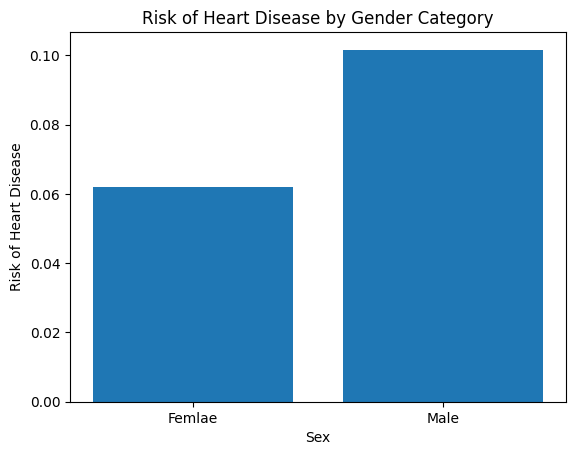

In [21]:
gender_group = data_without_duplicates.groupby('Sex')
risk_by_gender = gender_group['Heart_Disease'].mean()
gender_group_names = {
   0 : "Femlae", 1 : "Male"
}
plt.bar(gender_group_names.values(), risk_by_gender.values)
plt.xlabel('Sex')
plt.ylabel('Risk of Heart Disease')
plt.title('Risk of Heart Disease by Gender Category')
plt.xticks(rotation=0)
plt.show()

## The chances of having heart diseases of differnt age category

In [22]:
data_count['Age_Category'] = data_count['Age_Category'].replace({
     0: "18 to 24",
    1: "25 to 29",
    2: "30 to 34",
    3: "35 to 39",
    4: "40 to 44",
    5: "45 to 49",
    6: "50 to 54",
    7: "55 to 59",
    8: "60 to 64",
    9: "65 to 69",
    10: "70 to 74",
    11: "75 to 79",
    12: "80 or older"
})
age_count = data_count['Age_Category'].value_counts().sort_values()
print('Number of People According to their Age (Sorted)')
age_count

Number of People According to their Age (Sorted)


Age_Category
25 to 29       15456
30 to 34       18359
18 to 24       18570
35 to 39       20554
75 to 79       20676
45 to 49       20903
40 to 44       21532
80 or older    22227
50 to 54       25024
55 to 59       28000
70 to 74       31063
60 to 64       32350
65 to 69       33356
Name: count, dtype: int64

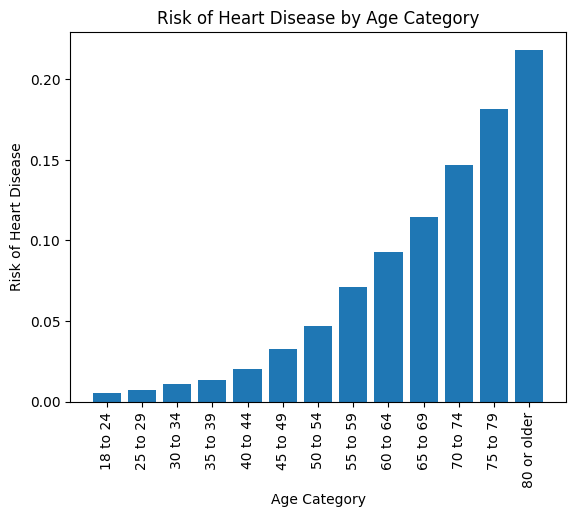

In [23]:
age_group = data_without_duplicates.groupby('Age_Category')
risk_by_age = age_group['Heart_Disease'].mean()
age_group_names = {
    0: "18 to 24",
    1: "25 to 29",
    2: "30 to 34",
    3: "35 to 39",
    4: "40 to 44",
    5: "45 to 49",
    6: "50 to 54",
    7: "55 to 59",
    8: "60 to 64",
    9: "65 to 69",
    10: "70 to 74",
    11: "75 to 79",
    12: "80 or older",
}
plt.bar(age_group_names.values(), risk_by_age.values)
plt.xlabel('Age Category')
plt.ylabel('Risk of Heart Disease')
plt.title('Risk of Heart Disease by Age Category')
plt.xticks(rotation=90)
plt.show()

## The chances of having heart diseases of differnt General Health

In [44]:
data_count['General_Health'] = data_count['General_Health'].replace({
    0: "Excellent",
    1: "Fair",
    2: "Good",
    3: "Poor",
    4: "Very Good"
})

general_health_count = data_count['General_Health'].value_counts().sort_values()
print('Number of People According to their General Health (Sorted)')
general_health_count

Number of People According to their General Health (Sorted)


General_Health
P     11331
F     35800
E     55710
G     95226
V    110003
Name: count, dtype: int64

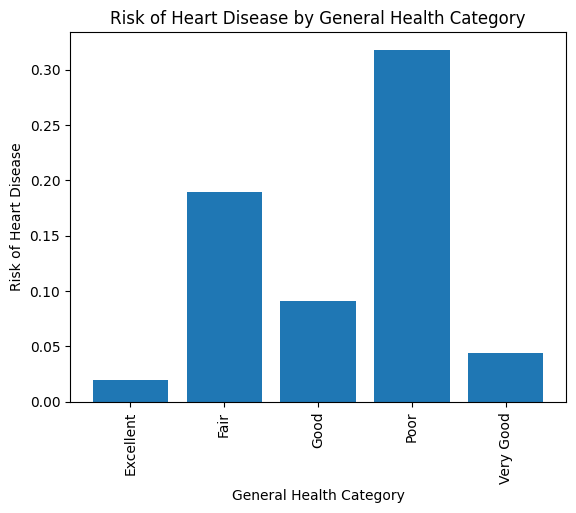

In [45]:
general_health_group = data_without_duplicates.groupby('General_Health')
risk_by_general_health = general_health_group['Heart_Disease'].mean()
general_health_group_names = {
    0: "Excellent",
    1: "Fair",
    2: "Good",
    3: "Poor",
    4: "Very Good"
}
plt.bar(general_health_group_names.values(), risk_by_general_health.values)
plt.xlabel('General Health Category')
plt.ylabel('Risk of Heart Disease')
plt.title('Risk of Heart Disease by General Health Category')
plt.xticks(rotation=90)
plt.show()


## The chances of having heart diseases according to their Excercise routine

In [27]:
data_count['Exercise'] = data_count['Exercise'].replace({
    0: "No",
    1: "Yes"
})

excercise_count = data_count['Exercise'].value_counts().sort_values()
print('Number of People According to their Excercise (Sorted)')
excercise_count

Number of People According to their Excercise (Sorted)


Exercise
No      69427
Yes    238643
Name: count, dtype: int64

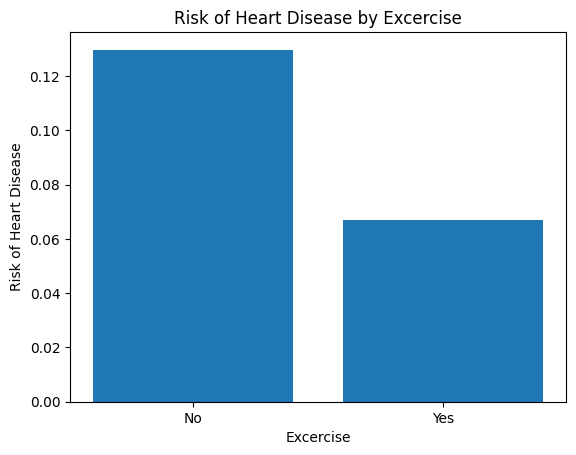

In [28]:
excercise_group = data_without_duplicates.groupby('Exercise')
risk_by_excercise = excercise_group['Heart_Disease'].mean()
excercise_group_names = {
    0: "No",
    1: "Yes"
}
plt.bar(excercise_group_names.values(), risk_by_excercise.values)
plt.xlabel('Excercise')
plt.ylabel('Risk of Heart Disease')
plt.title('Risk of Heart Disease by Excercise')
plt.xticks(rotation=0)
plt.show()


## The chances of having heart diseases according to their Skin Cancer

In [29]:
data_count['Skin_Cancer'] = data_count['Skin_Cancer'].replace({
    0: "No",
    1: "Yes"
})

skin_cancer_count = data_count['Skin_Cancer'].value_counts().sort_values()
print('Number of People According to their Skin_Cancer (Sorted)')
skin_cancer_count

Number of People According to their Skin_Cancer (Sorted)


Skin_Cancer
Yes     29982
No     278088
Name: count, dtype: int64

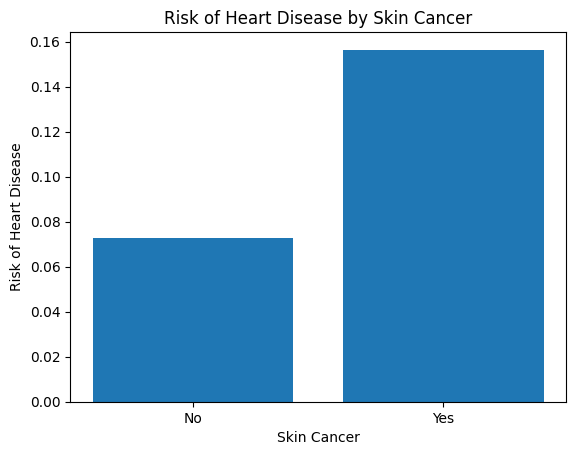

In [30]:
skin_cancer_group = data_without_duplicates.groupby('Skin_Cancer')
risk_by_skin_cancer = skin_cancer_group['Heart_Disease'].mean()
skin_cancer_group_names = {
    0: "No",
    1: "Yes"
}
plt.bar(skin_cancer_group_names.values(), risk_by_skin_cancer.values)
plt.xlabel('Skin Cancer')
plt.ylabel('Risk of Heart Disease')
plt.title('Risk of Heart Disease by Skin Cancer')
plt.xticks(rotation=0)
plt.show()


## The chances of having heart diseases if they have Depression

In [31]:
data_count['Depression'] = data_count['Depression'].replace({
    0: "No",
    1 : 'Yes'
})

depression_count = data_count['Depression'].value_counts().sort_values()
print('Number of People According to their Depression (Sorted)')
depression_count

Number of People According to their Depression (Sorted)


Depression
Yes     61884
No     246186
Name: count, dtype: int64

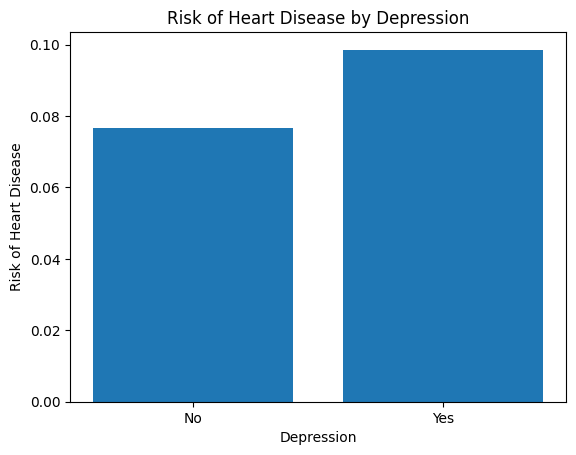

In [32]:
depression_group = data_without_duplicates.groupby('Depression')
risk_by_depression = depression_group['Heart_Disease'].mean()

depression_group_names = {
    0: "No",
    1: "Yes"
}
plt.bar(depression_group_names.values(), risk_by_depression.values)
plt.xlabel('Depression')
plt.ylabel('Risk of Heart Disease')
plt.title('Risk of Heart Disease by Depression')
plt.xticks(rotation=0)
plt.show()

## The chances of having heart diseases according to their Smoking History

In [33]:
data_count['Smoking_History'] = data_count['Smoking_History'].replace({
     0: "No",
    1: "Yes"
})

smoking_count = data_count['Smoking_History'].value_counts().sort_values()
print('Number of People According to their Smoking_History (Sorted)')
smoking_count

Number of People According to their Smoking_History (Sorted)


Smoking_History
Yes    125158
No     182912
Name: count, dtype: int64

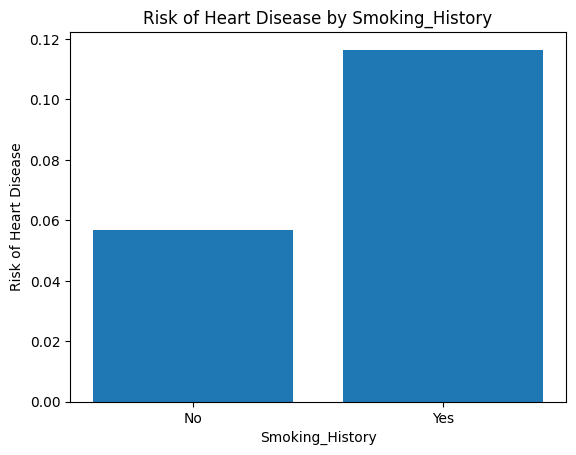

In [34]:
smoking_group = data_without_duplicates.groupby('Smoking_History')
risk_by_smoking = smoking_group['Heart_Disease'].mean()

smoking_group_names = {
    0: "No",
    1: "Yes"
}
plt.bar(smoking_group_names.values(), risk_by_smoking.values)
plt.xlabel('Smoking_History')
plt.ylabel('Risk of Heart Disease')
plt.title('Risk of Heart Disease by Smoking_History')
plt.xticks(rotation=0)
plt.show()

## The chances of having heart diseases according to their Diabetes

In [35]:
data_count['Diabetes'] = data_count['Diabetes'].replace({
     0: "No",
     1: "No, pre-diabetes or borderline diabetes",
     2: "Yes",
     3: "Yes, but female told only during pregnancy"
})

diabetes_count = data_count['Diabetes'].value_counts().sort_values()
print('Number of People According to their Diabetes (Sorted)')
diabetes_count

Number of People According to their Diabetes (Sorted)


Diabetes
Yes, but female told only during pregnancy      2646
No, pre-diabetes or borderline diabetes         6896
Yes                                            40160
No                                            258368
Name: count, dtype: int64

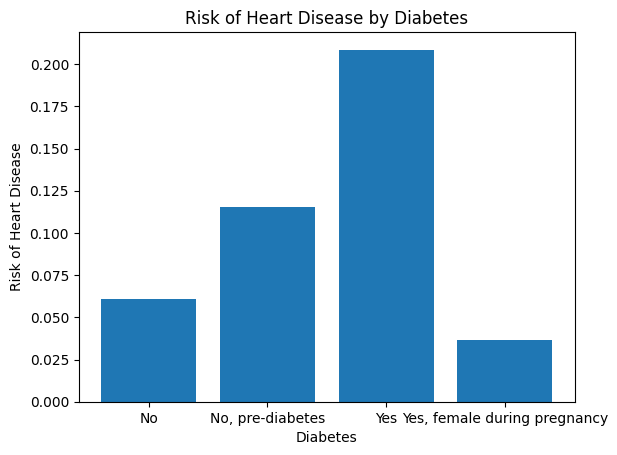

In [36]:
diabetes_group = data_without_duplicates.groupby('Diabetes')
risk_by_diabetes = diabetes_group['Heart_Disease'].mean()

diabetes_group_names = {
    0: "No",
     1: "No, pre-diabetes", # No, pre-diabetes or borderline diabetes AS No, pre-diabetes
     2: "Yes",
     3: "Yes, female during pregnancy" # Yes, but female told only during pregnancy AS Yes, female during pregnancy
}
plt.bar(diabetes_group_names.values(), risk_by_diabetes.values)
plt.xlabel('Diabetes')
plt.ylabel('Risk of Heart Disease')
plt.title('Risk of Heart Disease by Diabetes')
plt.xticks(rotation=0)
plt.show()

In [37]:
data_without_duplicates.columns

Index(['General_Health', 'Exercise', 'Skin_Cancer', 'Other_Cancer',
       'Depression', 'Diabetes', 'Arthritis', 'Sex', 'Age_Category',
       'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'Heart_Disease'],
      dtype='object')

## Feature Scaling using StandardScaler

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [12]:
X = data_without_duplicates.drop('Heart_Disease', axis=1) # use all features except target column
y = data_without_duplicates['Heart_Disease'] # target data

In [13]:
# data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [135]:
# !pip install scikeras

## Feedforward Neural Network (FNN) or a Multi-Layer Perceptron (MLP) Model Evaluation

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from scikeras.wrappers import KerasClassifier
# from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [16]:
X_train_scaled.shape

(246456, 16)

In [17]:
# function to create the model
def create_model(dropout_rate=0.5):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
        Dropout(dropout_rate),
        Dense(64, activation='relu'),
        Dropout(dropout_rate),
        Dense(32, activation='relu'),
        Dropout(dropout_rate),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [18]:
# Hyperparameter tuning with cross-validation
model = KerasClassifier(build_fn=create_model, verbose=2, dropout_rate=0.5)
param_dist = {
    'batch_size': [32],
    'epochs': [50],
}

In [19]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report

In [21]:
random_search_fnn = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=5, cv=5, scoring='accuracy', n_jobs=-1)
history_fnn = random_search_fnn.fit(X_train_scaled, y_train)

C:\Users\saons\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 1 is smaller than n_iter=5. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\saons\AppData\Local\Programs\Python\Python312\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\saons\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
7702/7702 - 13s - 2ms/step - accuracy: 0.9185 - loss: 0.2479
Epoch 2/50
7702/7702 - 11s - 1ms/step - accuracy: 0.9186 - loss: 0.2370
Epoch 3/50
7702/7702 - 11s - 1ms/step - accuracy: 0.9184 - loss: 0.2358
Epoch 4/50
7702/7702 - 10s - 1ms/step - accuracy: 0.9183 - loss: 0.2350
Epoch 5/50
7702/7702 - 11s - 1ms/step - accuracy: 0.9183 - loss: 0.2350
Epoch 6/50
7702/7702 - 11s - 1ms/step - accuracy: 0.9183 - loss: 0.2343
Epoch 7/50
7702/7702 - 11s - 1ms/step - accuracy: 0.9184 - loss: 0.2342
Epoch 8/50
7702/7702 - 10s - 1ms/step - accuracy: 0.9185 - loss: 0.2340
Epoch 9/50
7702/7702 - 10s - 1ms/step - accuracy: 0.9182 - loss: 0.2339
Epoch 10/50
7702/7702 - 11s - 1ms/step - accuracy: 0.9183 - loss: 0.2337
Epoch 11/50
7702/7702 - 11s - 1ms/step - accuracy: 0.9185 - loss: 0.2339
Epoch 12/50
7702/7702 - 13s - 2ms/step - accuracy: 0.9184 - loss: 0.2334
Epoch 13/50
7702/7702 - 10s - 1ms/step - accuracy: 0.9184 - loss: 0.2340
Epoch 14/50
7702/7702 - 11s - 1ms/step - accuracy: 0.9182 - 

In [25]:
best_fnn = history_fnn.best_estimator_
y_pred_fnn = best_fnn.predict(X_test_scaled)
accuracy_fnn = accuracy_score(y_test, y_pred_fnn)
print("Accuracy of FNN: {:.2f}%".format(accuracy_fnn * 100))
print("Best Parameters:",history_fnn.best_params_)
print("Classification Report:")
print(classification_report(y_test, y_pred_fnn))

1926/1926 - 1s - 742us/step
Accuracy of FNN: 91.99%
Best Parameters: {'epochs': 50, 'batch_size': 32}
Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56680
           1       0.00      0.00      0.00      4934

    accuracy                           0.92     61614
   macro avg       0.46      0.50      0.48     61614
weighted avg       0.85      0.92      0.88     61614



C:\Users\saons\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\saons\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\saons\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

## Recurrent Neural Network (RNN) or Long Short-Term Memory (LSTM) Model Evaluation

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, SimpleRNN
from tensorflow.keras.optimizers import Adam

In [27]:
data_without_duplicates.columns

Index(['General_Health', 'Exercise', 'Skin_Cancer', 'Other_Cancer',
       'Depression', 'Diabetes', 'Arthritis', 'Sex', 'Age_Category',
       'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'Heart_Disease'],
      dtype='object')

In [28]:
def create_rnn_model(dropout_rate=0.5):
    model = Sequential([
        SimpleRNN(128, activation='relu', input_shape=(X_train_scaled.shape[1], 1)),
        Dropout(dropout_rate),
        Dense(64, activation='relu'),
        Dropout(dropout_rate),
        Dense(32, activation='relu'),
        Dropout(dropout_rate),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [29]:
# Create a KerasClassifier
rnn_model = KerasClassifier(build_fn=create_rnn_model, verbose=2, dropout_rate=0.5)

In [30]:
param_dist = {
    'batch_size': [32, 64],
    'epochs': [50],
    # 'dropout_rate': [0.3, 0.5, 0.7]
}

In [31]:
random_search_rnn = RandomizedSearchCV(estimator=rnn_model, param_distributions=param_dist, n_iter=5, cv=5, scoring='accuracy', n_jobs=-1)
history_rnn = random_search_rnn.fit(X_train_scaled, y_train)

C:\Users\saons\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 2 is smaller than n_iter=5. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\saons\AppData\Local\Programs\Python\Python312\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\saons\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
7702/7702 - 29s - 4ms/step - accuracy: 0.9185 - loss: 0.2538
Epoch 2/50
7702/7702 - 29s - 4ms/step - accuracy: 0.9185 - loss: 0.2376
Epoch 3/50
7702/7702 - 27s - 4ms/step - accuracy: 0.9182 - loss: 0.2356
Epoch 4/50
7702/7702 - 27s - 3ms/step - accuracy: 0.9183 - loss: 0.2344
Epoch 5/50
7702/7702 - 31s - 4ms/step - accuracy: 0.9183 - loss: 0.2331
Epoch 6/50
7702/7702 - 27s - 4ms/step - accuracy: 0.9185 - loss: 0.2321
Epoch 7/50
7702/7702 - 28s - 4ms/step - accuracy: 0.9183 - loss: 0.2320
Epoch 8/50
7702/7702 - 26s - 3ms/step - accuracy: 0.9183 - loss: 0.2325
Epoch 9/50
7702/7702 - 28s - 4ms/step - accuracy: 0.9182 - loss: 0.2329
Epoch 10/50
7702/7702 - 28s - 4ms/step - accuracy: 0.9184 - loss: 0.2327
Epoch 11/50
7702/7702 - 27s - 4ms/step - accuracy: 0.9184 - loss: 1.0637
Epoch 12/50
7702/7702 - 27s - 4ms/step - accuracy: 0.9183 - loss: 0.2316
Epoch 13/50
7702/7702 - 27s - 3ms/step - accuracy: 0.9183 - loss: 0.2320
Epoch 14/50
7702/7702 - 27s - 3ms/step - accuracy: 0.9183 - 

In [40]:
best_rnn = history_rnn.best_estimator_
y_pred_rnn = best_rnn.predict(X_test_scaled)
accuracy_rnn = accuracy_score(y_test, y_pred_rnn)
print("Accuracy of RNN: {:.2f}%".format(accuracy_rnn * 100))
print("Best Parameters:",history_rnn.best_params_)
print("Classification Report:")
print(classification_report(y_test, y_pred_rnn))

1926/1926 - 3s - 1ms/step
Accuracy of RNN: 91.99%
Best Parameters: {'epochs': 50, 'batch_size': 32}
Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56680
           1       0.00      0.00      0.00      4934

    accuracy                           0.92     61614
   macro avg       0.46      0.50      0.48     61614
weighted avg       0.85      0.92      0.88     61614



C:\Users\saons\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\saons\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\saons\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

## XGBoost Model Evaluation

In [33]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

In [34]:
param_dist = {
    'learning_rate': uniform(0.01, 0.3),  
    'max_depth': randint(3, 10), 
    'min_child_weight': uniform(1, 10),  
    'subsample': uniform(0.6, 0.4),  
    'colsample_bytree': uniform(0.6, 0.4),  
    'gamma': uniform(0, 0.5),  
    'reg_alpha': uniform(0, 10),  
    'reg_lambda': uniform(0, 10),  
    'n_estimators': [100, 200, 300]  
}

In [35]:
xgb_clf = XGBClassifier(random_state=42, verbosity=2)

In [36]:
random_search_xgb = RandomizedSearchCV(estimator=xgb_clf, param_distributions=param_dist, 
                                   n_iter=50, cv=5, scoring='accuracy', random_state=42)
random_search_xgb.fit(X_train_scaled, y_train, verbose=2)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                        'n_estimators': [100, 200, 300],
                                        'reg_alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001CAC7AB3620>,
                                        'reg_lambda': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001CAC7AB3800>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001CAC7AB30B0>},
                   random_state=42, scoring='accuracy')

In [41]:
best_xgb_clf = random_search_xgb.best_estimator_
# print("Best parameters found:", best_xgb_clf.best_params_) # XGBClassifier has no param like best_params_
y_pred_xgb = best_xgb_clf.predict(X_test_scaled)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("Accuracy: {:.2f}%".format(accuracy_xgb * 100))
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))

Accuracy: 92.00%
Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56680
           1       0.51      0.03      0.06      4934

    accuracy                           0.92     61614
   macro avg       0.72      0.52      0.51     61614
weighted avg       0.89      0.92      0.89     61614



## Random Forest Model Evaluation

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [48]:
param_dist = {
    'n_estimators': [100, 200],  
    'min_samples_split': randint(2, 20),  
    'min_samples_leaf': randint(1, 20),  
    'max_features': ['auto', 'sqrt'],  
    'bootstrap': [True, False] 
}

In [49]:
random_search_rf = RandomForestClassifier(random_state=42, verbose=False)

In [50]:
random_search_rf = RandomizedSearchCV(estimator=random_search_rf, param_distributions=param_dist, n_iter=5, cv=5, scoring='accuracy', random_state=42)
random_search_rf.fit(X_train_scaled, y_train)

C:\Users\saons\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
10 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\saons\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\saons\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\saons\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(random_state=42,
                                                    verbose=False),
                   n_iter=5,
                   param_distributions={'bootstrap': [True, False],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001CACB7CAAE0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001CACB5D1790>,
                                        'n_estimators': [100, 200]},
                   random_state=42, scoring='accuracy')

In [51]:
y_pred_rf = random_search_rf.predict(X_test_scaled)
accuracy_rf = accuracy_score(y_test, y_pred_xgb)
print("Accuracy: {:.2f}%".format(accuracy_rf * 100))
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

Accuracy: 92.00%
Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56680
           1       0.57      0.01      0.02      4934

    accuracy                           0.92     61614
   macro avg       0.74      0.50      0.49     61614
weighted avg       0.89      0.92      0.88     61614



In [73]:
test_list = [accuracy_fnn, accuracy_rnn, accuracy_xgb, accuracy_rf]
names = ['FNN', 'RNN', 'XGBoost','Random Forest']

# train_list = pd.DataFrame(train_list)
test_list = pd.DataFrame(test_list)
names = pd.DataFrame(names)

# train_list.columns = ['train']
test_list.columns = ['Accuracy']
names.columns = ['Models']


over_all_score = pd.concat([names,  test_list], axis=1)
over_all_score

,Models,Accuracy
0,FNN,0.919921
1,RNN,0.919921
2,XGBoost,0.920018
3,Random Forest,0.920018


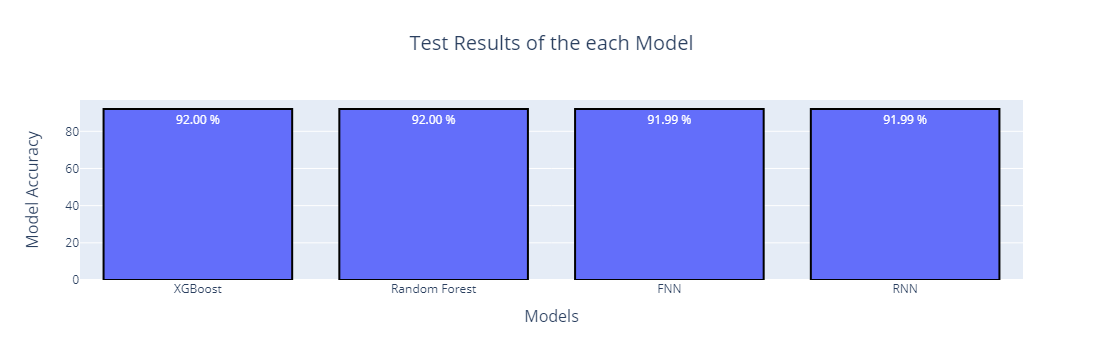

In [74]:
import plotly.graph_objects as go

fig = go.Figure(data=[
    go.Bar(name='Test Results', x=over_all_score['Models'], y=over_all_score['Accuracy']*100,
           marker=dict(line=dict(width=5)),
           texttemplate='%{y:,.2f} %', textposition='inside',)
])

fig.update_layout(barmode='group', xaxis={'categoryorder': 'total descending'})

fig.update_xaxes(title_text="Models", title_font={"size": 16})
fig.update_yaxes(title_text="Model Accuracy", title_font={"size": 16})

fig.update_layout(title_text='Test Results of the each Model',
                  title_x=0.5, title_font=dict(size=20))
fig.update_traces(marker=dict(line=dict(color='#000000', width=2)))

fig.show()

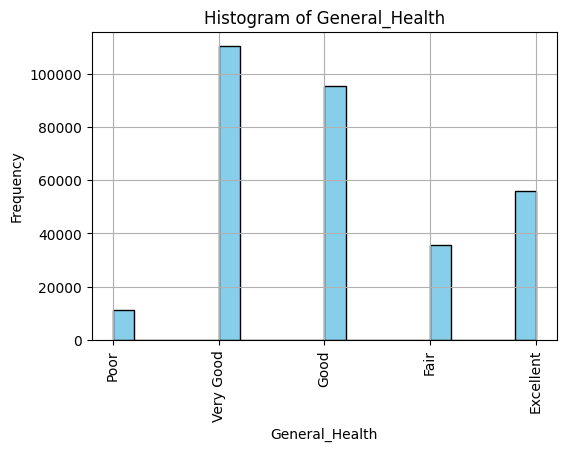

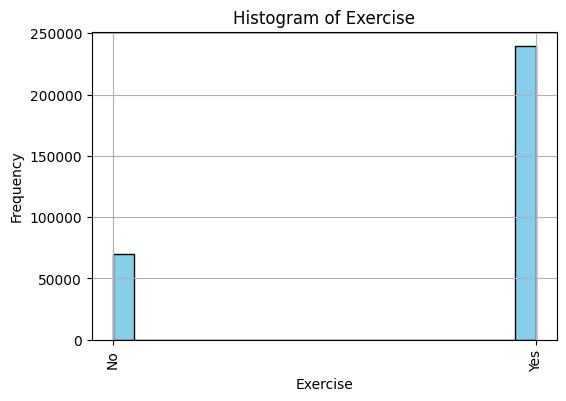

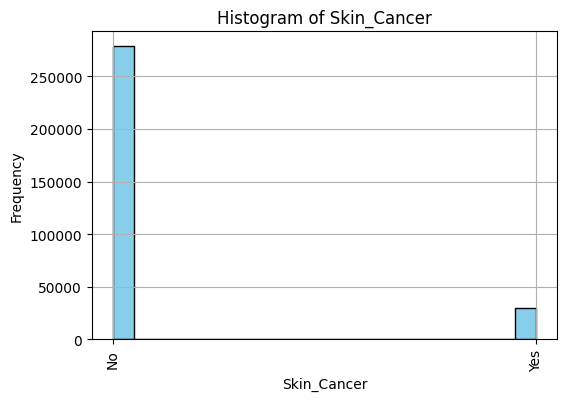

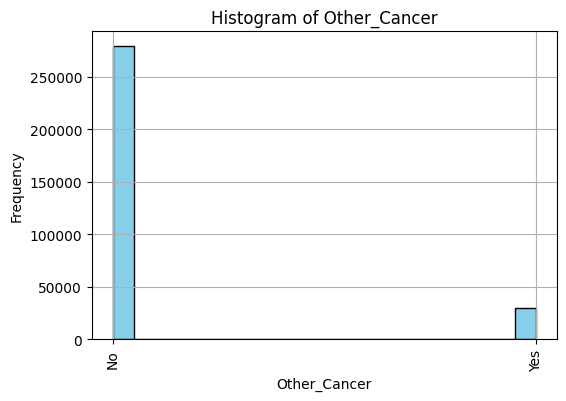

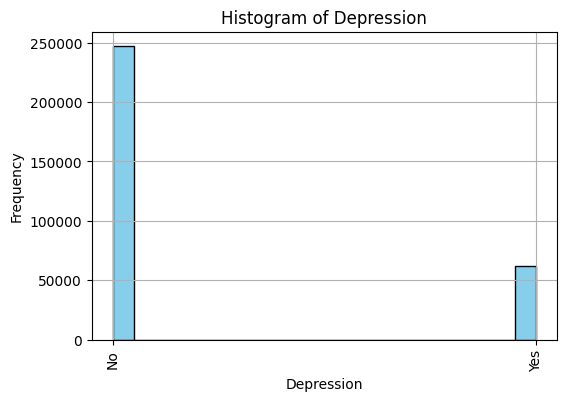

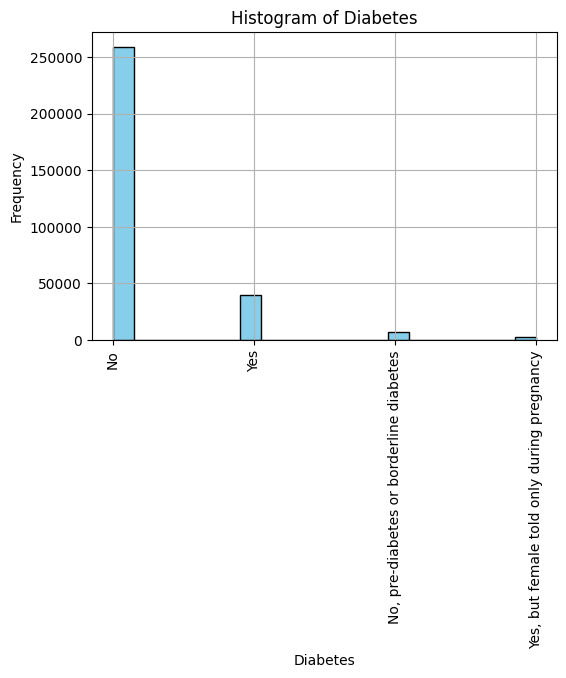

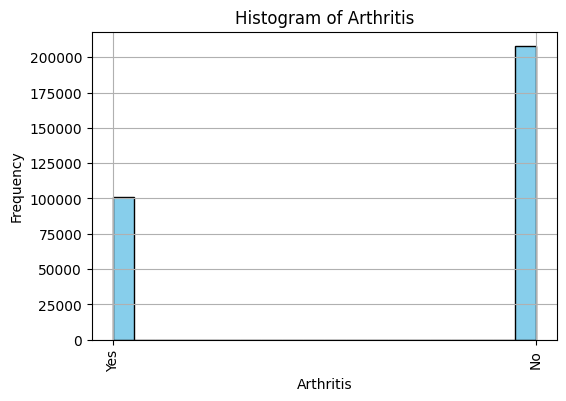

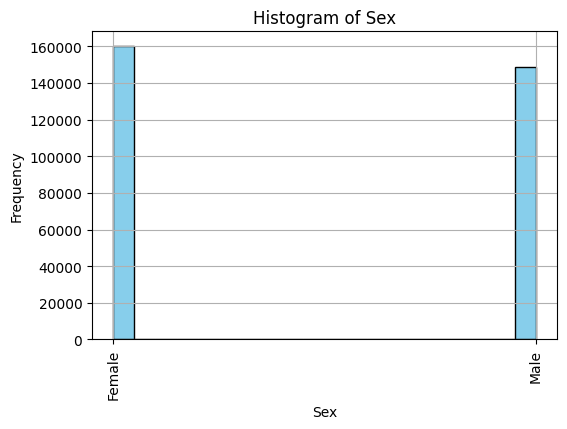

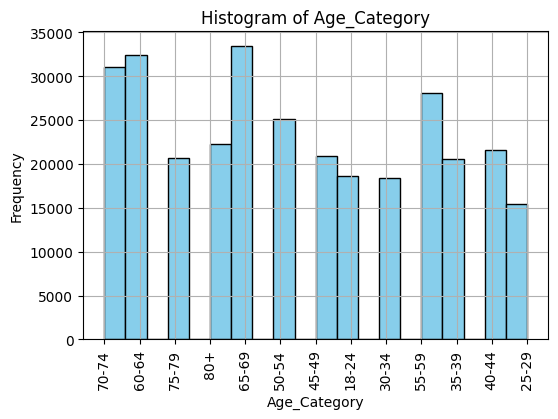

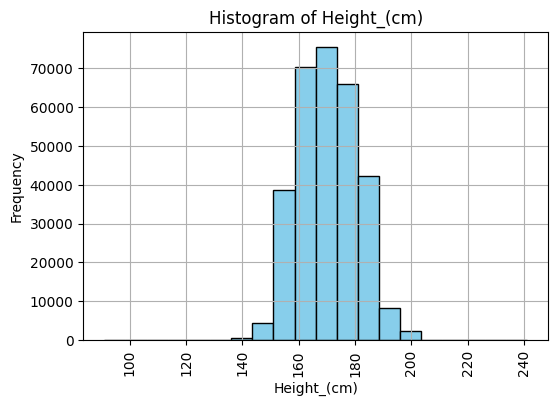

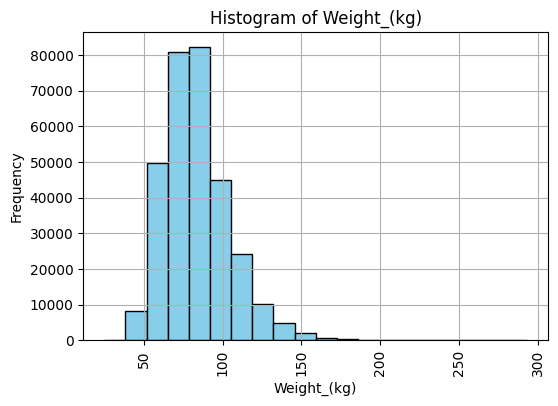

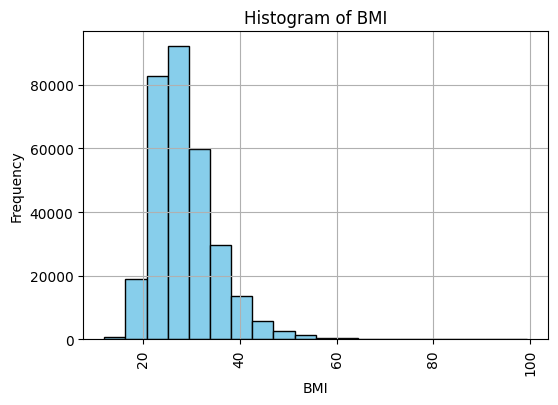

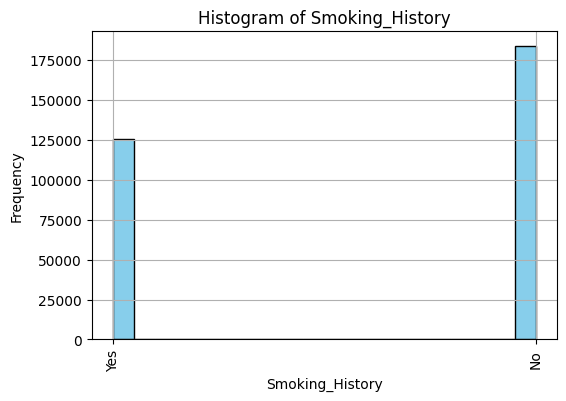

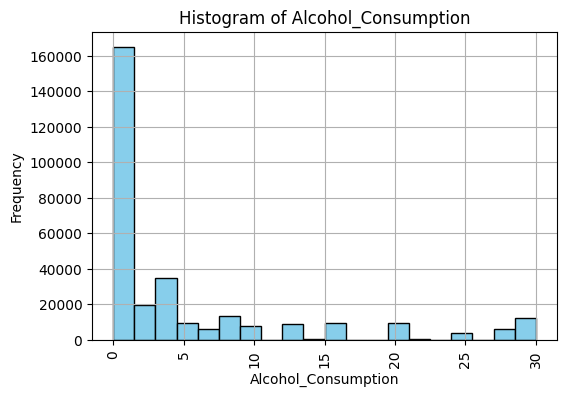

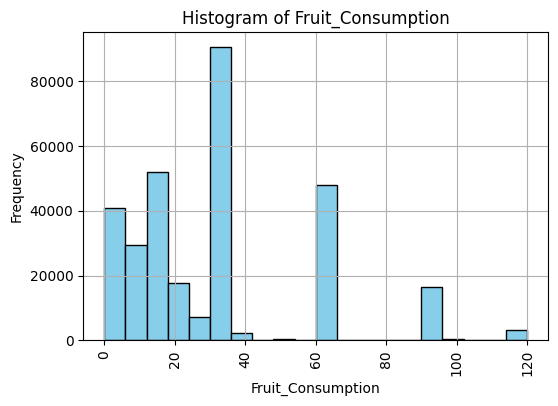

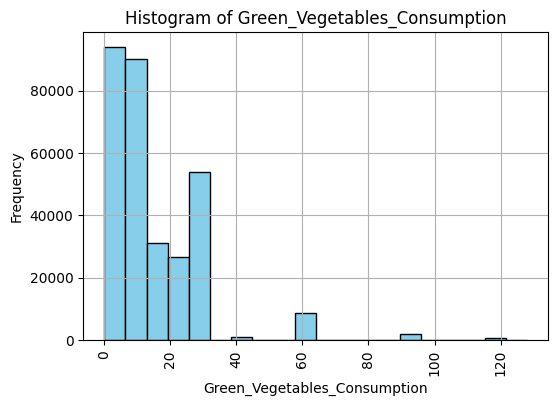

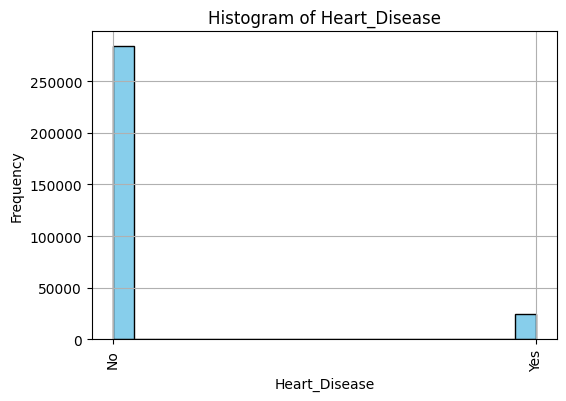

In [75]:
for column in data_without_duplicates.columns:
    plt.figure(figsize=(6, 4))  
    plt.hist(data[column], bins=20, color='skyblue', edgecolor='black')  
    plt.title('Histogram of {}'.format(column))  
    plt.xlabel(column)  
    plt.ylabel('Frequency')  
    plt.grid(True)  
    plt.xticks(rotation=90)
    plt.show()  

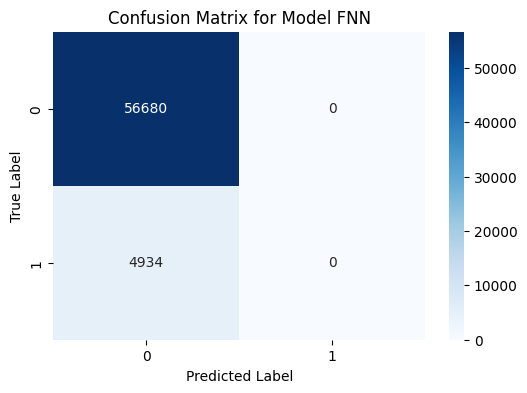

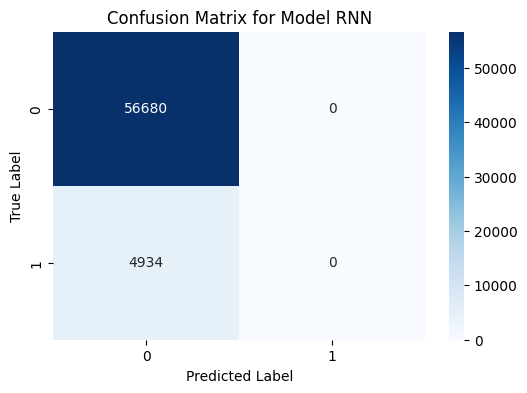

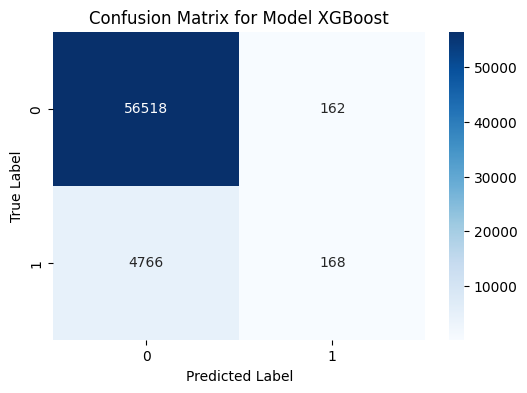

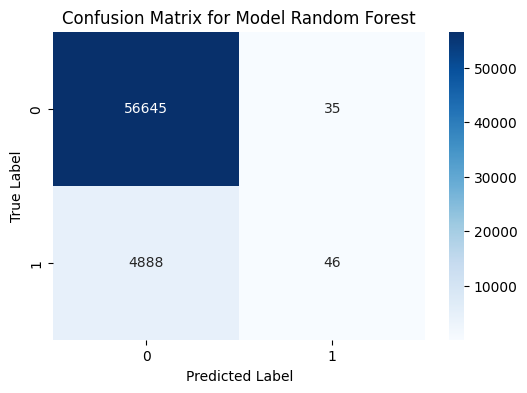

In [76]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# List of models and their corresponding predictions
models = over_all_score['Models']  # Add all your models here

predictions = [y_pred_fnn, y_pred_rnn, y_pred_xgb, y_pred_rf]  

# Loop through each model and its predictions
for idx, (model, y_pred) in enumerate(zip(models, predictions), start=1):
    cm = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=True)
    plt.title('Confusion Matrix for Model {}'.format(models[idx-1]))
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


C:\Users\saons\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\saons\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\saons\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



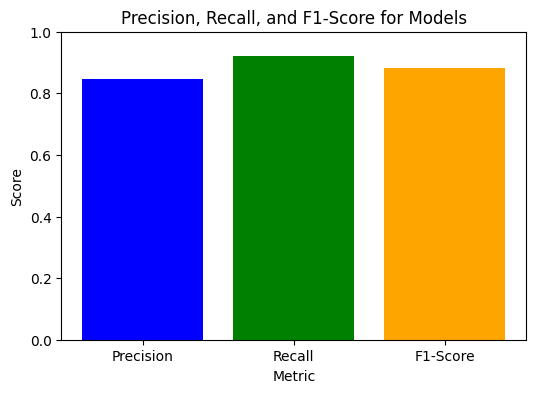

In [77]:
# List of models, model names, and their corresponding predictions
# models = [model1, model2, model3]  # Add all your models here
# model_names = ['Model 1', 'Model 2', 'Model 3']  # Add names corresponding to each model
# predictions = [y_pred1, y_pred2, y_pred3]  # Add all corresponding predictions here

# Loop through each model, model name, and its predictions
for model, model_name, y_pred in zip(models, names, predictions):
    # Generate classification report
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Extract precision, recall, and F1-score from the report
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1_score = report['weighted avg']['f1-score']
    
    # Plot precision, recall, and F1-score
    plt.figure(figsize=(6, 4))
    plt.bar(['Precision', 'Recall', 'F1-Score'], [precision, recall, f1_score], color=['blue', 'green', 'orange'])
    plt.title('Precision, Recall, and F1-Score for {}'.format(model_name))
    plt.xlabel('Metric')
    plt.ylabel('Score')
    plt.ylim(0, 1)  # Set y-axis limit to [0, 1]
    plt.show()
